<a href="https://colab.research.google.com/github/ShohamWeiss/Machine-Vision-Project/blob/master/Project%20Research/NN_Image_Object_Position_Locator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Binary search a rectangle

## Data Creation

### Make a background image

10

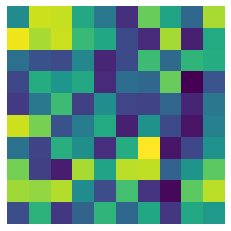

In [ ]:
import random
import matplotlib.pyplot as plt

def makeBackground(size):
  myDrawing = []
  for i in range(size):
    temp = []
    for i in range(size):
      temp.append(random.randint(0,150))
    myDrawing.append(temp)
  return myDrawing
background = makeBackground(10)
plt.axis('off')
plt.imshow(background)
plt.savefig('myBackground',dpi=3, pad_inches=0.0, bbox_inches = 'tight')
len(background)

### Make images with random squares

In [ ]:
import copy
import numpy as np

def makeRandomDot(background, width, value):
  xCenter = random.randint(width,len(background)-1-width)
  yCenter = random.randint(width,len(background)-1-width)
  myCopy = copy.deepcopy(background)
  for x in range((xCenter-width),(xCenter+width)):
    for y in range(yCenter-width,yCenter+width):
      myCopy[y][x] = value
  myCopy = np.array(myCopy)
  return myCopy

In [ ]:
data = {'images': [], 'label': []}
size = 20

for i in range(1000):
  background = makeBackground(size)
  on = random.randint(0,1)
  if (on == 1):
    data['images'].append(makeRandomDot(background,3,100))
  else:
    data['images'].append(background)
  data['label'].append(on)

## Data Exploration

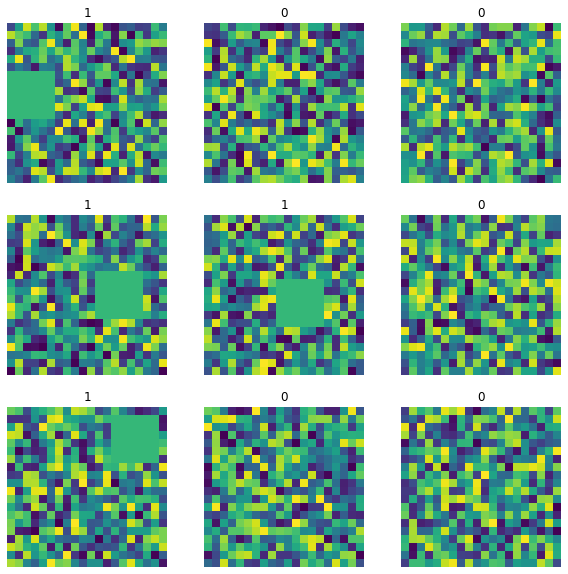

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  label = data['label'][i]
  ax = plt.subplot(3, 3, i + 1)
  plt.title(label)
  plt.axis("off")
  
  plt.imshow(data['images'][i])
plt.show()

## Data Preparation

### Creating the test and train data

In [ ]:
import numpy as np
percentTraining = 0.9
numTrainin = int(percentTraining*len(data['images']))
train_images = data['images'][:numTrainin]
train_labels = data['label'][:numTrainin]
test_images = data['images'][numTrainin:]
test_labels = data['label'][numTrainin:]

train_images = np.array(train_images)/255
train_labels = np.array(train_labels)
test_images = np.array(test_images)/255
test_labels = np.array(test_labels)

print('Num of training:', len(train_images))
print('Num of testing:', len(test_images))

Num of training: 900
Num of testing: 100


## Build the model

In [ ]:
import tensorflow as tf
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.5.181.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.5.181.122:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


### Set up layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((20,20,1)),
    tf.keras.layers.Conv2D(40,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(20,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(20,(1,1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1),
])

### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

### Feed the model

In [ ]:
model.fit(train_images, train_labels, epochs=40, validation_split=0.1, batch_size=20)

Epoch 1/40
 1/41 [..............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.4500WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0007s vs `on_train_batch_end` time: 0.0131s). Check your callbacks.


40/41 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5225WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_test_batch_end` time: 0.0046s). Check your callbacks.


41/41 [==============================] - 1s 17ms/step - loss: 0.6909 - accuracy: 0.5222 - val_loss: 0.6986 - val_accuracy: 0.4556
Epoch 2/40
41/41 [==============================] - 1s 13ms/step - loss: 0.6795 - accuracy: 0.5222 - val_loss: 0.6595 - val_accuracy: 0.4556
Epoch 3/40
41/41 [==============================] - 0s 12ms/step - loss: 0.6194 - accuracy: 0.5778 - val_loss: 0.5761 - val_accuracy: 0.8111
Epoch 4/40
41/41 [==============================] - 0s 12ms/step - loss: 0.5535 - accuracy: 0.6926 - val_loss: 0.4483 - val_accuracy: 0.8667
Epoch 5/40
41/41 [==============================] - 0s 12ms/step - loss: 0.3437 - accuracy: 0.8444 - val_loss: 0.3560 - val_accuracy: 0.7333
Epoch 6/40
41/41 [==============================] - 0s 12ms/step - loss: 0.2119 - accuracy: 0.9099 - val_loss: 0.1782 - val_accuracy: 0.9556
Epoch 7/40
41/41 [==============================] - 1s 12ms/step - loss: 0.1389 - accuracy: 0.9543 - val_loss: 0.1707 - val_accuracy: 0.9556
Epoch 8/40
41/41 [======

### Make prediction

In [ ]:
predictions = model.predict(test_images)
preds = tf.round(tf.nn.sigmoid(predictions))

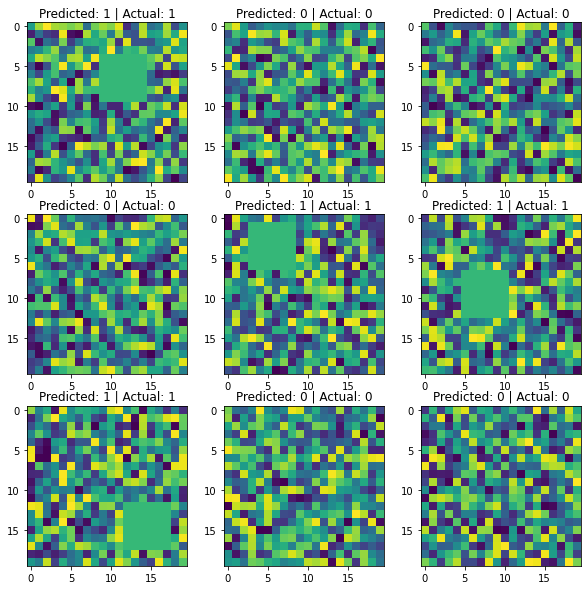

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  pred = preds.numpy()[i]
  ax = plt.subplot(3,3,i+1)
  title = 'Predicted: ' + str(int(pred[0])) + ' | Actual: ' + str(int(test_labels[i]))
  plt.title(title)
  plt.imshow(test_images[i].reshape(20,20))
plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

1/4 [======>.......................] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0007s vs `on_test_batch_end` time: 0.0091s). Check your callbacks.


4/4 [==============================] - 0s 14ms/step - loss: 0.0722 - accuracy: 0.9700


[0.07219772785902023, 0.9700000286102295]

## Search algorithms

### Create sample

In [ ]:
predictions = model.predict(test_images)
preds = tf.round(tf.nn.sigmoid(predictions))
preds[1]
plt.matshow(test_images[1])

SyntaxError: ignored

In [ ]:
temp = copy.deepcopy(np.array(background).reshape(1,10,10,1))
predictions = model.predict(temp)
plt.matshow(temp.reshape(10,10))
plt.show()
print(predictions)

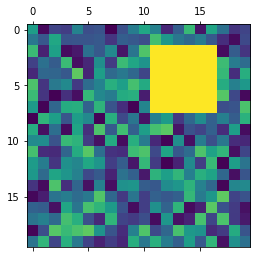

At: 16 , 3


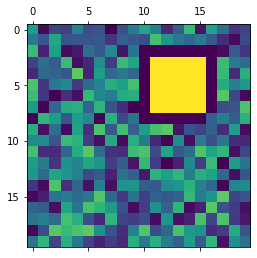

In [ ]:
import copy

width = 3
bgnd = makeBackground(20)
img = makeRandomDot(bgnd, width, 200)
img = img / 255
plt.matshow(img)
plt.show()

xs = []
ys = []
minX = 0
minY = 0
minConf = 1
for x in range(0,20-width):
  temp = copy.deepcopy(img)
  temp[:,x-width:x+width] = 0
  # plt.matshow(temp)
  # plt.show()
  temp = temp.reshape(1,20,20,1)
  prediction = model.predict(temp)
  prediction = tf.nn.sigmoid(prediction).numpy()[0]
  if (prediction < 0.7):
    # print(x,y,prediction)
    xs.append(x)
  if (prediction < minConf):
    minX = x
    minConf = prediction
    # print(x,y,prediction)
minConf = 1
for y in range(0,17):
  temp = copy.deepcopy(img)
  temp[y-width:y+width,:] = 0
  # plt.matshow(temp)
  # plt.show()
  temp = temp.reshape(1,20,20,1)
  prediction = model.predict(temp)
  prediction = tf.nn.sigmoid(prediction).numpy()[0]
  if (prediction < 0.7):
    # print(prediction)
    ys.append(y)
  if (prediction < minConf):
    minY = y
    minConf = prediction
    # print(x,y,prediction)
print('At:', minX, ',', minY)
# img[minY,minX] = 0.8
# img[np.max(ys), np.max(xs)] = 0.8
# plt.matshow(img)
# plt.show()
xFrom = np.min(xs) - 1
xTo = np.max(xs)
yFrom = np.min(ys) - 1
yTo = np.max(ys)
for x in range(xFrom,xTo):
  img[yFrom,x] = 0
  img[yTo,x] = 0
for y in range(yFrom,yTo):
  img[y,xFrom] = 0
  img[y,xTo] = 0
    
plt.matshow(img)
plt.show()

# Part 2: Real image with circle at random location

## Data Creation

In [ ]:
import PIL
import pathlib
import os
import matplotlib.pyplot as plt
import random

### Get a background image

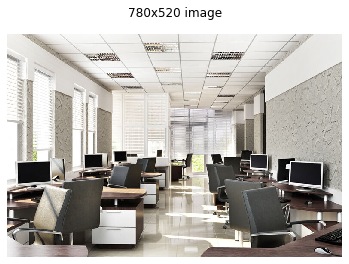

In [ ]:
bgnd = PIL.Image.open('office.jpg')
width, height = bgnd.size
plt.matshow(bgnd)
plt.title(str(width)+'x'+str(height) + ' image')
plt.axis('off')
plt.show()

### Function for putting a shape at random locations

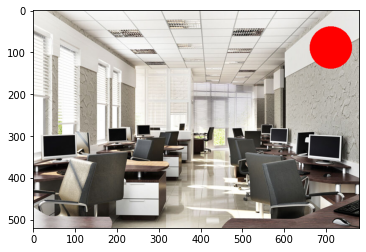

In [ ]:
from PIL import ImageDraw
import copy
def addCircle(background, size):
  width, height = background.size
  x = random.randint(0,width-size)
  y = random.randint(0,height-size)
  r = size
  img = copy.deepcopy(background)
  draw = ImageDraw.Draw(img)
  draw.ellipse([x,y,x+size,y+size], fill=(255, 0, 0))
  # plt.imshow(img)
  return img, x, y
img2, x, y = addCircle(bgnd,100)
plt.imshow(img2)

### Create data

In [ ]:
import tensorflow as tf
import numpy as np

images = []
labels = []

for i in range(300):
  on = random.randint(0,1)
  img = bgnd
  if (on == 1):
    img, x, y = addCircle(bgnd,100)
  images.append(tf.keras.preprocessing.image.img_to_array(img))
  labels.append(np.array(on))
print(len(images))

300


## Data exploration

Looking at different images

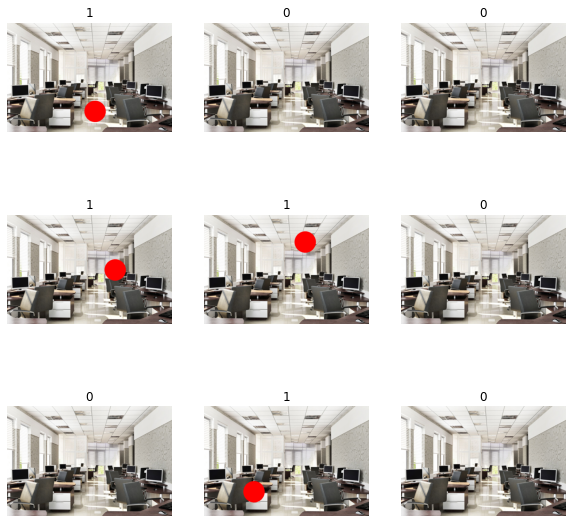

In [ ]:
plt.figure(figsize=(10, 10)) 
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.title(labels[i])
  plt.axis("off")
  plt.imshow(images[i]/255)

Looking at the three channels



image shape: 1216800
np array shape: (520, 780, 3)


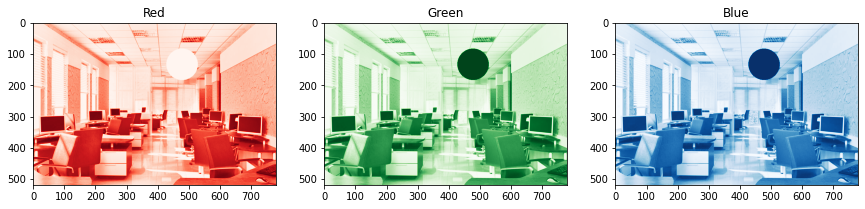

In [ ]:
import numpy
img = images[4]
print('image shape:',img.size)
img = numpy.array(img)
print('np array shape:', img.shape)

plt.figure(figsize=(20,10))
ax = plt.subplot(1,4,1)
plt.title('Red')
plt.imshow(img[:,:,0], cmap='Reds_r', alpha=1)
ax = plt.subplot(1,4,2)
plt.title('Green')
plt.imshow(img[:,:,1], cmap='Greens_r', alpha=1)
ax = plt.subplot(1,4,3)
plt.title('Blue')
plt.imshow(img[:,:,2], cmap='Blues_r', alpha=1)

## Data Preparation

In [ ]:
import numpy as np

percentTrain = 0.9
numTrain = int(len(images)*percentTrain)
train_images = np.array(images[:numTrain])/255
train_labels = np.array(labels[:numTrain])
test_images = np.array(images[numTrain:])/255
test_labels = np.array(labels[numTrain:])

print('Num of training:', len(train_images))
print('Num of testing:', len(test_images))
train_images.shape

Num of training: 270
Num of testing: 30


(270, 520, 780, 3)

## Build the model

### Set up TPU

In [ ]:
import tensorflow as tf
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.113.178.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.113.178.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


### Set up layers

In [ ]:
model = tf.keras.Sequential([
    # tf.keras.layers.Conv2D(40,(3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, batch_size=10)

Epoch 1/10
 2/25 [=>............................] - ETA: 17s - loss: 37.4027 - accuracy: 0.6000WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 0.6864s). Check your callbacks.


25/25 [==============================] - ETA: 0s - loss: 7.0139 - accuracy: 0.5432WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0007s vs `on_test_batch_end` time: 0.1016s). Check your callbacks.


25/25 [==============================] - 19s 747ms/step - loss: 7.0139 - accuracy: 0.5432 - val_loss: 4.4581 - val_accuracy: 0.4444
Epoch 2/10
25/25 [==============================] - 17s 685ms/step - loss: 1.0488 - accuracy: 0.6049 - val_loss: 0.5837 - val_accuracy: 0.5556
Epoch 3/10
25/25 [==============================] - 17s 682ms/step - loss: 0.2551 - accuracy: 0.8683 - val_loss: 0.2977 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 17s 686ms/step - loss: 0.3304 - accuracy: 0.8765 - val_loss: 0.2140 - val_accuracy: 0.8889
Epoch 5/10
25/25 [==============================] - 17s 696ms/step - loss: 0.1170 - accuracy: 0.9712 - val_loss: 0.4541 - val_accuracy: 0.7778
Epoch 6/10
25/25 [==============================] - 17s 691ms/step - loss: 0.0292 - accuracy: 0.9959 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 17s 691ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 8/10

### Make Prediction

In [ ]:
predictions = model.predict(test_images)
preds = tf.round(tf.nn.sigmoid(predictions))

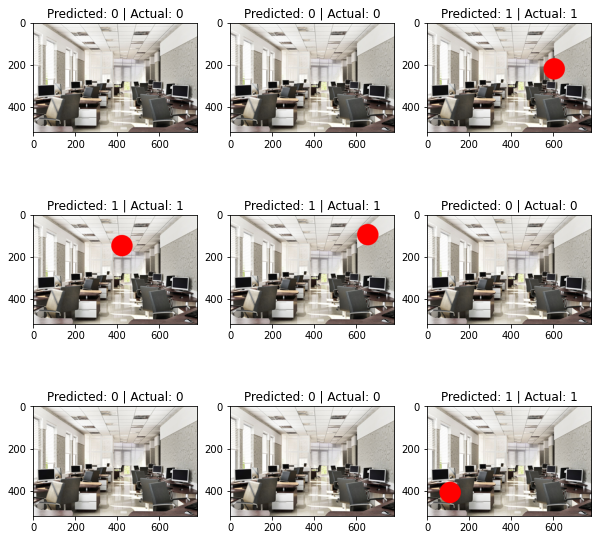

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  pred = preds.numpy()[i]
  ax = plt.subplot(3,3,i+1)
  title = 'Predicted: ' + str(int(pred[0])) + ' | Actual: ' + str(int(test_labels[i]))
  plt.title(title)
  plt.imshow(test_images[i])
plt.show()

### Evaluate model

In [ ]:
model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 257ms/step - loss: 0.1620 - accuracy: 0.9333


[0.1619688868522644, 0.9333333373069763]